In [1]:
import numpy as np
import cv2
%matplotlib inline

from skimage import color
from skimage import io

from scipy import ndimage

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image


In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

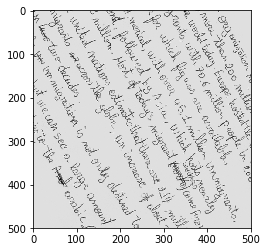

In [3]:
#Test importing and cropping image to center 

image = color.rgb2gray(mpimg.imread('data_prepared/1.png'))
plt.imshow(image, cmap='gray') # show image in grayscale

image = crop_center(image, 500, 500)
plt.imshow(image, cmap='gray') # show image in grayscale



In [4]:
def import_image_and_crop(datapath,crop_size=1000):
    ''' Read the image, convert it to grayscale, and use only the (crop_size x crop_size) center
    If the crop_size is larger than the image_size, use padding'''
    image = color.rgb2gray(mpimg.imread(datapath))
    if(np.shape(image)[0]<crop_size or np.shape(image)[1]<crop_size):
        # If the crop size is too large for the image, copy the border to enlarge the image again
        dif_height = int(np.ceil( (crop_size - np.shape(image)[0]) /2))
        dif_width = int(np.ceil( (crop_size - np.shape(image)[1]) /2))
        if(dif_height<0):
            dif_height = 0
        if(dif_width<0):
            dif_width = 0
        image = cv2.copyMakeBorder(image,dif_height,dif_height,dif_width,dif_width,cv2.BORDER_REPLICATE)
    image = crop_center(image, crop_size, crop_size)
    return image

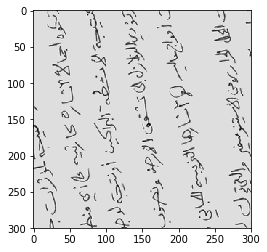

In [9]:
plt.imshow(import_image_and_crop('data_prepared/911.png', 300), cmap='gray')
# example of an image that is too big for the cropsize and therefore "regenerated"

In [25]:
# import data

from os import listdir
from os.path import isfile, join
import random

crop_size = 250

# Here, you can choose the folder data_prepared for all data, data_prepared_X for the language X only

onlyfiles = [f for f in listdir('data_prepared_english/') if isfile(join('data_prepared_english/', f))] # get list of datanames in folder
#onlyfiles = [f for f in listdir('data_prepared_arabic/') if isfile(join('data_prepared_arabic/', f))] # get list of datanames in folder
#onlyfiles = [f for f in listdir('data_prepared/') if isfile(join('data_prepared/', f))] # get list of datanames in folder

number_data = len(onlyfiles) - 1 # How many datafiles? One less because there is a list for the rotations
datanames = np.linspace(0,number_data-1,number_data, dtype=np.int32)

X_train_pre = np.empty([number_data,crop_size,crop_size]) # create array to be filled, remember crop_size

for counter in datanames:
    print(counter, end="\r")
    datapath = 'data_prepared_english/' + str(int(counter))+'.png' # i know this is ugly
    #datapath = 'data_prepared_arabic/' + str(int(number_of_file))+'.png' # i know this is ugly
    #datapath = 'data_prepared/' + str(int(number_of_file))+'.png' # i know this is ugly
    X_train_pre[counter,:,:] = import_image_and_crop(datapath, crop_size)
    
    

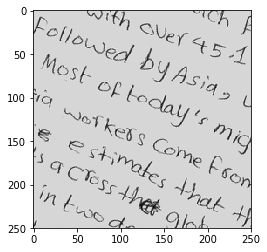

In [29]:
plt.imshow(X_train_pre[5,:,:], cmap='gray') # show image in grayscale, now squared and in the middle


In [30]:
# load angle list
Y_train_pre2 = np.loadtxt('data_prepared_english/angle_list.txt', delimiter=',', unpack=True)
#Y_train_pre2 = np.loadtxt('data_prepared_arabic/angle_list.txt', delimiter=',', unpack=True)
#Y_train_pre2 = np.loadtxt('data_prepared/angle_list.txt', delimiter=',', unpack=True)

Y_train_pre2.reshape((number_data,1))


array([[133.],
       [247.],
       [ 84.],
       [ 78.],
       [ 21.],
       [338.],
       [229.],
       [271.],
       [103.],
       [232.],
       [187.],
       [ 50.],
       [166.],
       [135.],
       [284.],
       [232.],
       [112.],
       [ 77.],
       [ 75.],
       [282.],
       [ 68.],
       [337.],
       [173.],
       [197.],
       [161.],
       [142.],
       [325.],
       [221.],
       [ 88.],
       [ 99.],
       [153.],
       [101.],
       [ 45.],
       [288.],
       [ 69.],
       [ 22.],
       [274.],
       [100.],
       [266.],
       [ 77.],
       [280.],
       [358.],
       [120.],
       [194.],
       [276.],
       [111.],
       [ 47.],
       [ 71.],
       [319.],
       [ 98.],
       [135.],
       [205.],
       [141.],
       [ 49.],
       [ 13.],
       [356.],
       [100.],
       [179.],
       [226.],
       [312.],
       [137.],
       [ 68.],
       [ 68.],
       [ 71.],
       [353.],
       [232.],
       [10

In [31]:
X_train_pre = X_train_pre.astype('float32')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train_pre = scaler.fit_transform(X_train_pre.reshape(X_train_pre.shape[0],crop_size*crop_size))
Y_train_pre = scaler_y.fit_transform(Y_train_pre2.reshape(-1,1))

Y_train_pre

array([[0.36944444],
       [0.68611111],
       [0.23333333],
       [0.21666667],
       [0.05833333],
       [0.93888889],
       [0.63611111],
       [0.75277778],
       [0.28611111],
       [0.64444444],
       [0.51944444],
       [0.13888889],
       [0.46111111],
       [0.375     ],
       [0.78888889],
       [0.64444444],
       [0.31111111],
       [0.21388889],
       [0.20833333],
       [0.78333333],
       [0.18888889],
       [0.93611111],
       [0.48055556],
       [0.54722222],
       [0.44722222],
       [0.39444444],
       [0.90277778],
       [0.61388889],
       [0.24444444],
       [0.275     ],
       [0.425     ],
       [0.28055556],
       [0.125     ],
       [0.8       ],
       [0.19166667],
       [0.06111111],
       [0.76111111],
       [0.27777778],
       [0.73888889],
       [0.21388889],
       [0.77777778],
       [0.99444444],
       [0.33333333],
       [0.53888889],
       [0.76666667],
       [0.30833333],
       [0.13055556],
       [0.197

In [32]:
# own periodic loss function
# 0.5 <-> 180 depending on using the scaler or not
from keras import backend as K
def mse_periodic(y_true, y_pred):
    per_value = 0.5 #0.5 for scaled to (0,1), 180 for scaled to (0,360) (normal)
    #y_true = y_true % (per_value * 2)
    #y_pred = y_pred % (per_value * 2)
    diff = per_value - abs(abs(y_true - y_pred) - per_value)
    return K.mean(K.square(diff), axis=-1)


/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [71]:
# weird thingy 
shape_ord = (crop_size, crop_size, 1)

X_train_pre2 = X_train_pre


X_train_pre2 = X_train_pre2.reshape((X_train_pre2.shape[0],) + shape_ord)
X_train_pre2 = X_train_pre2.astype('float32')

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

# -- Initializing the values for the convolution neural network

nb_epoch = 20  # kept very low! Please increase if you can use a GPU

batch_size = 256
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

model = Sequential()

model.add(Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), padding='valid', activation='relu', 
                 input_shape=shape_ord))
model.add(Conv2D(64, kernel_size=(nb_conv, nb_conv), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


model.compile(loss=mse_periodic, optimizer='adam')
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 248, 248, 32)      320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 246, 246, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 123, 123, 64)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 968256)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               123936896 
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train_pre2, Y_train_pre, test_size=0.3, random_state=20)

Y_val

array([[0.85555556],
       [0.46944444],
       [0.33333333],
       [0.88611111],
       [0.23888889],
       [0.30277778],
       [0.9       ],
       [0.63055556],
       [0.3       ],
       [0.68611111],
       [0.83333333],
       [0.14166667],
       [0.63055556],
       [0.8       ],
       [0.16944444],
       [0.76944444],
       [0.01944444],
       [0.78888889],
       [0.19166667],
       [0.59444444],
       [0.3       ],
       [0.275     ],
       [0.40833333],
       [0.73611111],
       [0.48611111],
       [0.88333333],
       [0.90555556],
       [0.42777778],
       [0.35833333],
       [0.01666667],
       [0.29444444],
       [0.56666667],
       [0.86111111],
       [0.02222222],
       [0.18888889],
       [0.99444444],
       [0.375     ],
       [0.78333333],
       [0.32777778],
       [0.90277778],
       [0.57777778],
       [0.86666667],
       [0.29444444],
       [0.24722222],
       [0.82777778],
       [0.38611111],
       [0.76388889],
       [0.436

In [73]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_val, Y_val))

Train on 665 samples, validate on 285 samples
Epoch 1/20
665/665 [==============================] - 70s 105ms/step - loss: 6795.1180 - val_loss: 4727.9133
Epoch 2/20
665/665 [==============================] - 68s 102ms/step - loss: 2624.1851 - val_loss: 16.1669
Epoch 3/20
665/665 [==============================] - 68s 102ms/step - loss: 69.5196 - val_loss: 35.1771
Epoch 4/20
665/665 [==============================] - 67s 101ms/step - loss: 21.3622 - val_loss: 0.8795
Epoch 5/20
665/665 [==============================] - 68s 102ms/step - loss: 0.5022 - val_loss: 0.0780
Epoch 6/20
665/665 [==============================] - 68s 102ms/step - loss: 0.0872 - val_loss: 0.0794
Epoch 7/20
665/665 [==============================] - 71s 106ms/step - loss: 0.0847 - val_loss: 0.0841
Epoch 8/20
665/665 [==============================] - 71s 107ms/step - loss: 0.0822 - val_loss: 0.0847
Epoch 9/20
665/665 [==============================] - 68s 102ms/step - loss: 0.0891 - val_loss: 0.0870
Epoch 10/20
66

In [70]:
Y_pred = model.predict(X_val)
Y_pred = scaler_y.inverse_transform(Y_pred)
for i in np.linspace(0,20,21, dtype=np.int32): 
    print(Y_pred[i], scaler_y.inverse_transform(Y_val)[i])
    


[-0.88357097] [308.]
[42.979675] [169.]
[5.4647484] [120.]
[3.9511764] [319.]
[19.799673] [86.]
[9.094006] [109.]
[10.826796] [324.]
[20.7499] [227.]
[24.724535] [108.]
[5.7664704] [247.]
[5.4434166] [300.]
[9.009489] [51.]
[16.638796] [227.]
[5.0747123] [288.]
[6.276645] [61.]
[5.1148286] [277.]
[14.477588] [7.]
[14.743574] [284.]
[-1.1204207] [69.]
[17.192928] [214.]
[8.415691] [108.]
